<a href="https://colab.research.google.com/github/KARTHIKEYANC04052002/Live_Covid_cases/blob/main/Live_Covid_Cases_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://api.covid19india.org/state_district_wise.json"

In [3]:
raw_df = pd.read_json(url).T

In [4]:
covid_df = pd.DataFrame()

In [5]:
for i in raw_df.itertuples():
  temp_df = pd.DataFrame(i[1]).T
  temp_df['State'] = i[0]
  if covid_df.shape[0] > 0: covid_df = covid_df.append(temp_df)
  else: covid_df = temp_df

In [6]:
covid_states_df = covid_df.groupby('State').sum()

In [7]:
covid_states_df

,active,confirmed,deceased,migratedother,notes,recovered
State,,,,,,
Andaman and Nicobar Islands,91,7168,125,0,District-wise numbers are out-dated as cumulat...,6952
Andhra Pradesh,99057,1787883,11763,0,,1677063
Arunachal Pradesh,3271,30247,128,0,,26848
Assam,42305,446445,3793,1347,,392806
Bihar,7352,715179,9429,1,,698397
Chandigarh,649,60862,781,0,,59432
Chhattisgarh,18113,983916,13271,0,,952532
Dadra and Nagar Haveli and Daman and Diu,117,10445,4,31,,10293
Delhi,4212,1430433,24748,0,District-wise numbers are out-dated as cumulat...,1401473


In [ ]:
!pip install geopandas

In [9]:
import geopandas as gpd

In [10]:
india_map_df = pd.read_csv("https://raw.githubusercontent.com/KARTHIKEYANC04052002/Live_Covid_cases/main/Maps/India_States.csv")

In [11]:
india_map_df = gpd.GeoDataFrame(india_map_df)
india_map_df['geometry'] = gpd.GeoSeries.from_wkt(india_map_df['geometry'])

In [12]:
india_map_df = india_map_df.drop('Unnamed: 0', axis=1)

In [13]:
covid_states_df['state_name'] = covid_states_df.index
covid_states_df = covid_states_df[covid_states_df['state_name'] != 'State Unassigned']
covid_states_df = covid_states_df[covid_states_df['state_name'] != 'Ladakh']
covid_states_df = covid_states_df.sort_values('state_name')

In [14]:
merged_df = india_map_df.set_index('st_nm').join(covid_states_df.set_index('state_name'))

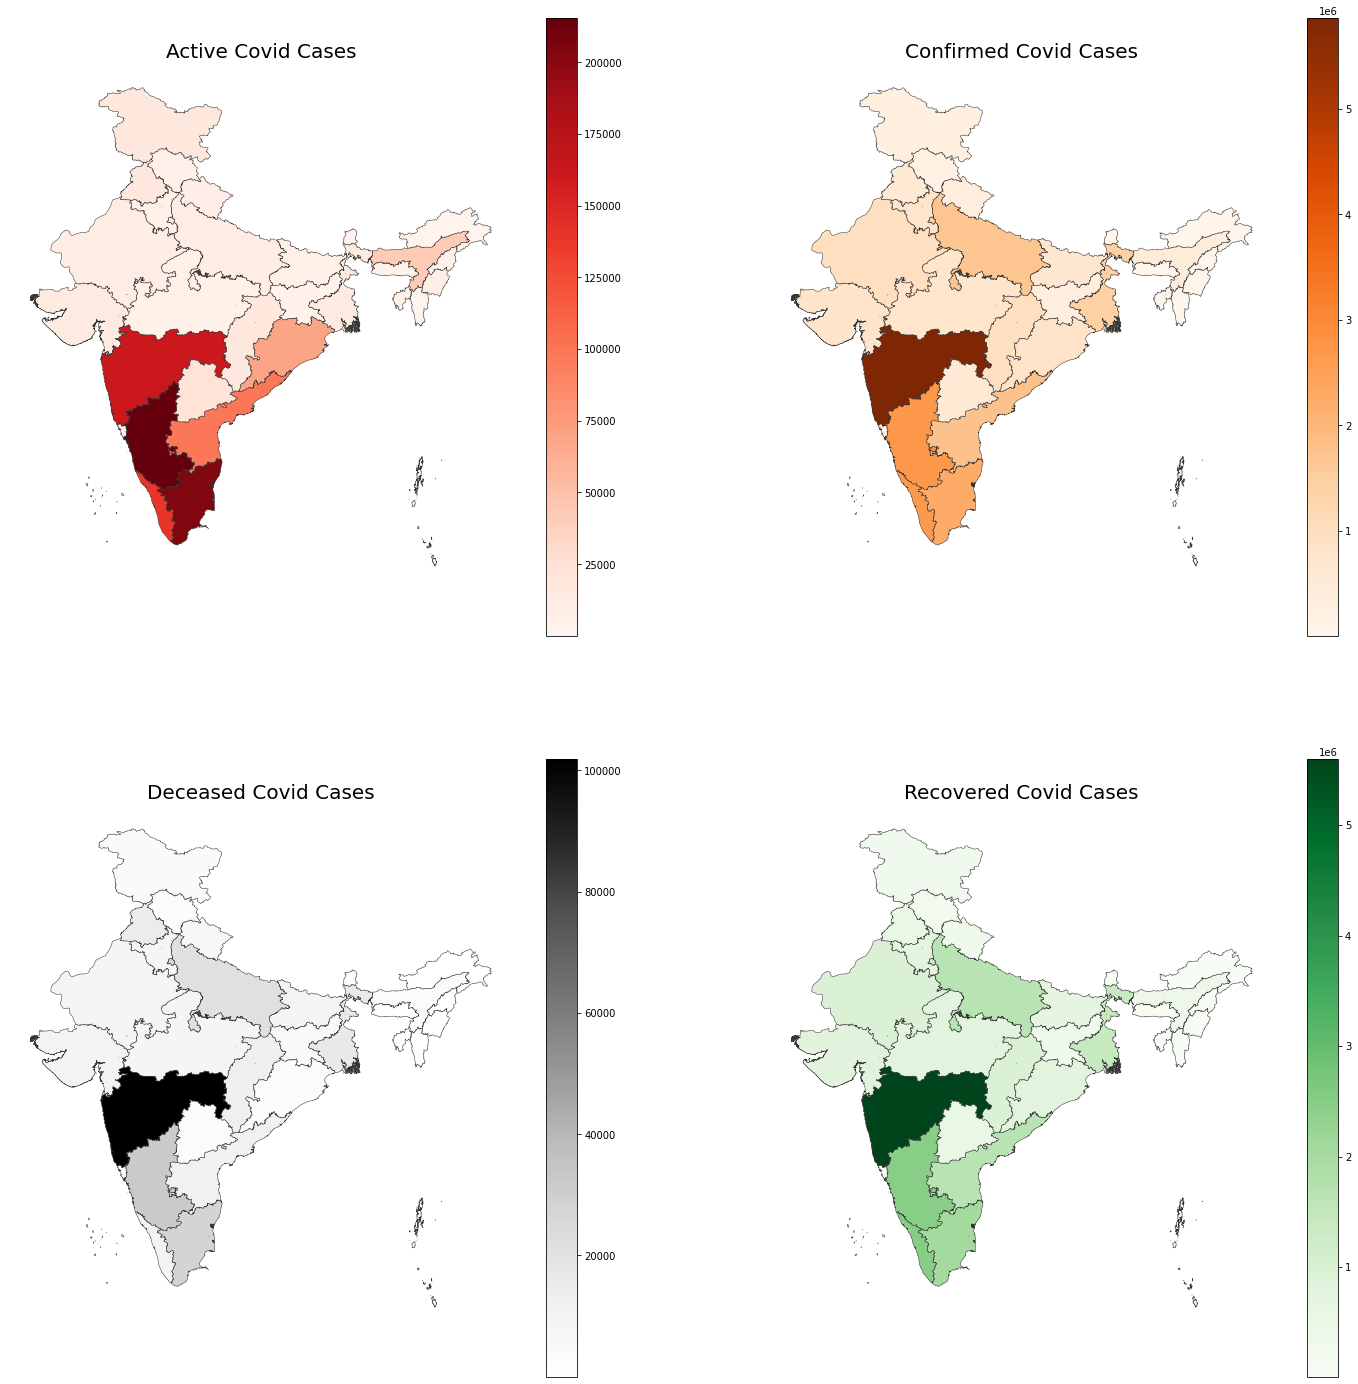

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(25, 25))
axs[0, 0].axis('off')
axs[0, 0].set_title('Active Covid Cases',
             fontdict={'fontsize': '20', 'fontweight' : '3'})
fig = merged_df.plot(column='active', cmap='Reds', linewidth=0.5, ax=axs[0, 0], edgecolor='0.2',legend=True)
axs[0, 1].axis('off')
axs[0, 1].set_title('Confirmed Covid Cases',
             fontdict={'fontsize': '20', 'fontweight' : '3'})
fig = merged_df.plot(column='confirmed', cmap='Oranges', linewidth=0.5, ax=axs[0, 1], edgecolor='0.2',legend=True)
axs[1, 0].axis('off')
axs[1, 0].set_title('Deceased Covid Cases',
             fontdict={'fontsize': '20', 'fontweight' : '3'})
fig = merged_df.plot(column='deceased', cmap='Greys', linewidth=0.5, ax=axs[1, 0], edgecolor='0.2',legend=True)
axs[1, 1].axis('off')
axs[1, 1].set_title('Recovered Covid Cases',
             fontdict={'fontsize': '20', 'fontweight' : '3'})
fig = merged_df.plot(column='recovered', cmap='Greens', linewidth=0.5, ax=axs[1, 1], edgecolor='0.2',legend=True)